In [1]:
import pickle
from sklearn.model_selection import KFold
import xgboost as xgb
import numpy as np
kf = KFold(5,shuffle=True,random_state=42)
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns

import matplotlib as mpl
mpl.rc("savefig", dpi=100)

In [2]:
valenceLabelsFolder = 'Dataset/valenceLabels.dat'
with open(valenceLabelsFolder,'rb') as f:
  valenceLabels = pickle.load(f)

In [3]:
arousalLabelsFolder = 'Dataset/arousalLabels.dat'
with open(arousalLabelsFolder,'rb') as f:
  arousalLabels = pickle.load(f)

In [9]:
FeaturesFolder = 'Dataset/bandPowerFeatures.dat'
with open(FeaturesFolder,'rb') as f:
  features = pickle.load(f)

In [10]:
features.shape

(32, 160, 168)

In [16]:
def testModel(model,labels,features):
    accuracy = []
    for s in range(32):
        print('subject:',s)
        subjectFeatures = features[s]
        y = labels[s]
        subjectScore = fit(model, subjectFeatures, y)
        accuracy.append(subjectScore)
    return accuracy

In [12]:
def fit(model, X, y, verbose=0):
    scores = []
    fold = 0
    for train_idx, test_idx in kf.split(X):
        if verbose > 1:
            print((fold + 1), '/', kf.n_splits)
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = y[train_idx], y[test_idx]
        m = clone(model)
        m.fit(X_train, Y_train)
        scores.append(m.score(X_test, Y_test))
        fold += 1
#     print(scores)
    return np.mean(scores)

In [13]:
xgBoostModel = xgb.XGBClassifier(n_estimators=20, max_depth=5)
knnModel = KNeighborsClassifier(n_neighbors=3)
svmModel = SVC(kernel='linear')

In [30]:
xgboostValence = testModel(xgBoostModel,valenceLabels,features)
xgboostValenceAcc = np.mean(xgboostValence)

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31


In [17]:
svmValence = testModel(svmModel,valenceLabels,features)
svmValenceAcc = np.mean(svmValence)

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31


In [18]:
knnValence = testModel(knnModel,valenceLabels,features)
knnValenceAcc = np.mean(knnValence)

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31


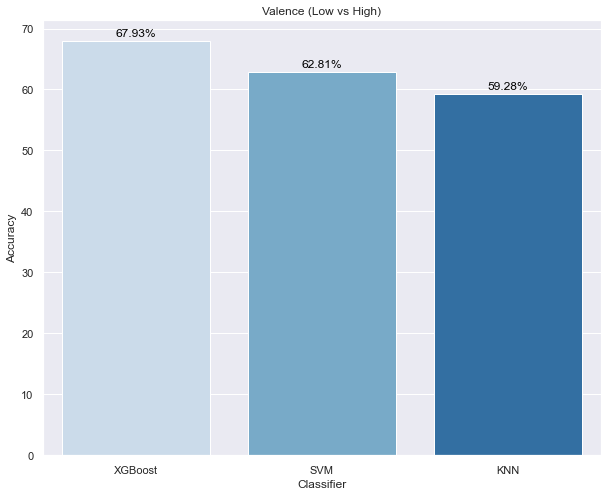

In [31]:
sns.set(style="darkgrid")

df = pd.DataFrame({
        'Classifier': ['XGBoost', 'SVM', 'KNN'],
        'Accuracy': [xgboostValenceAcc*100, svmValenceAcc*100, knnValenceAcc*100]
})

# Set the figure size
plt.figure(figsize=(10, 8))
plt.title("Valence (Low vs High)")

# Reorder this data frame
df = df.sort_values(['Accuracy'], ascending=False).reset_index(drop=True)

# Make a barplot
plot = sns.barplot(
    x="Classifier", 
    y="Accuracy", 
    data=df, 
    palette='Blues',
    dodge=False,
);
for p in plot.patches:
    plot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
        ha='center', va='bottom',
        color= 'black')
        
plot.get_figure().savefig("valence-powerFeatures.png")

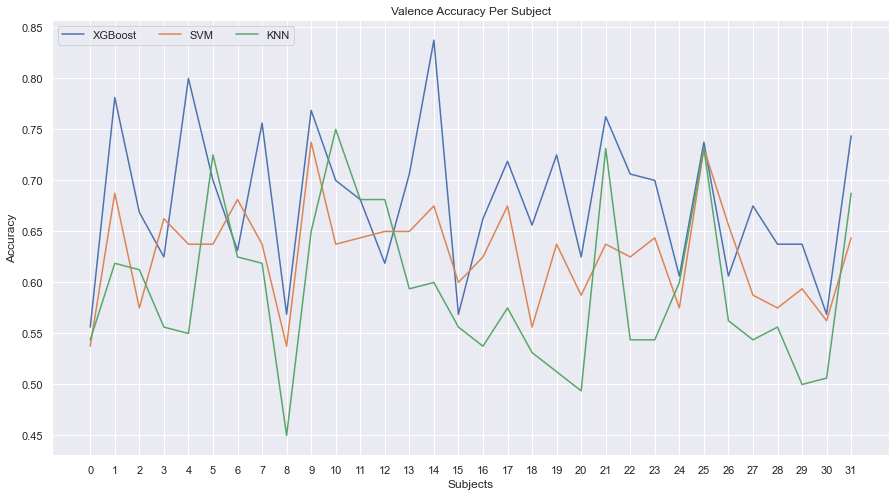

In [32]:
rng = np.random.RandomState(0)
x = np.arange(0,32,1)
y = np.array([xgboostValence,svmValence,knnValence])
y = np.einsum('ij->ji', y)

fig = plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.title("Valence Accuracy Per Subject")
plt.xlabel("Subjects")
plt.ylabel("Accuracy")
fig.axes[0].set_xticks(np.arange(len(x)))
plt.legend(['XGBoost','SVM','KNN'], ncol=3, loc='upper left');
fig.get_figure().savefig("valence-powerFeatures-allSubjects.png")

In [33]:
knnArousal = testModel(knnModel,arousalLabels,features)
knnArousalAcc = np.mean(knnArousal)

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31


In [34]:
xgboostArousal = testModel(xgBoostModel,arousalLabels,features)
xgboostArousalAcc = np.mean(xgboostArousal)

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31


In [35]:
svmArousal = testModel(svmModel,arousalLabels,features)
svmArousalAcc = np.mean(svmArousal)

subject: 0
subject: 1
subject: 2
subject: 3
subject: 4
subject: 5
subject: 6
subject: 7
subject: 8
subject: 9
subject: 10
subject: 11
subject: 12
subject: 13
subject: 14
subject: 15
subject: 16
subject: 17
subject: 18
subject: 19
subject: 20
subject: 21
subject: 22
subject: 23
subject: 24
subject: 25
subject: 26
subject: 27
subject: 28
subject: 29
subject: 30
subject: 31


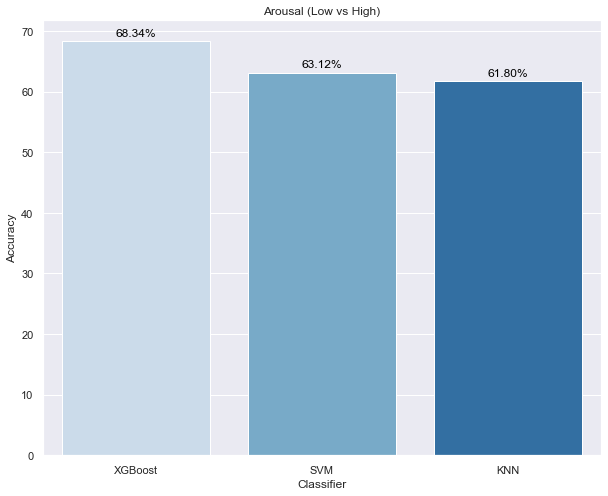

In [36]:

df = pd.DataFrame({
        'Classifier': ['XGBoost', 'SVM', 'KNN'],
        'Accuracy': [xgboostArousalAcc*100, svmArousalAcc*100, knnArousalAcc*100]
})

# Set the figure size
plt.figure(figsize=(10, 8))
plt.title("Arousal (Low vs High)")

# Reorder this data frame
# df = df.sort_values(['Accuracy'], ascending=False).reset_index(drop=True)

# Make a barplot
plot = sns.barplot(
    x="Classifier", 
    y="Accuracy", 
    data=df, 
    palette='Blues',
    dodge=False,
);
for p in plot.patches:
    plot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
        ha='center', va='bottom',
        color= 'black')
        
plot.get_figure().savefig("arousal-powerFeatures.png")

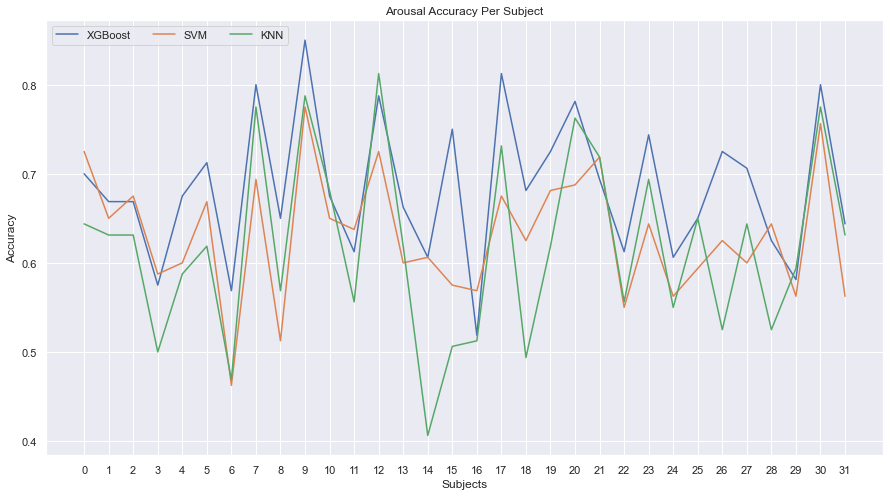

In [38]:
rng = np.random.RandomState(0)
x = np.arange(0,32,1)
y = np.array([xgboostArousal,svmArousal,knnArousal])
y = np.einsum('ij->ji', y)

fig = plt.figure(figsize=(15, 8))
plt.plot(x, y)
plt.title("Arousal Accuracy Per Subject")
plt.xlabel("Subjects")
plt.ylabel("Accuracy")
fig.axes[0].set_xticks(np.arange(len(x)))
plt.legend(['XGBoost','SVM','KNN'], ncol=3, loc='upper left');
fig.get_figure().savefig("arousal-powerFeatures-allSubjects.png")